In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('BDD_BaseDeDonnées.xlsx')

In [ ]:
print(df.head())

         ID AMONT Grpe_etu   Type_acc Classe      Genre  \
0  92390078   Oui   Témoin  Collectif   4ème  Un garçon   
1  92390115   Oui   Témoin  Collectif   4ème  Une fille   
2  92390045   Oui   Témoin  Collectif   4ème  Un garçon   
3  92390060   Oui   Témoin  Collectif   4ème  Une fille   
4  92390150   Oui   Témoin  Collectif   4ème  Un garçon   

                           Etu1_A Etu2_A       Dp1_A       Dp2_A  ...  \
0                     Bac général      0  Plutôt oui         Oui  ...   
1                     Je sais pas      0  Plutôt oui         Oui  ...   
2  Bac professionnel ou technique      3         Oui         Oui  ...   
3                          Bac +3      8  Plutôt oui         Oui  ...   
4                     Bac général      9  Plutôt oui  Plutôt oui  ...   

    Orient1_B   Orient2_B   Orient3_B Orient4_B Orient5_B Orient6_B Orient7_B  \
0         Oui  Plutôt oui         Non       NaN       NaN       NaN       NaN   
1         Oui         Oui         Oui       

In [ ]:
print(df[['Classe', 'Type_acc']].head())

  Classe   Type_acc
0   4ème  Collectif
1   4ème  Collectif
2   4ème  Collectif
3   4ème  Collectif
4   4ème  Collectif


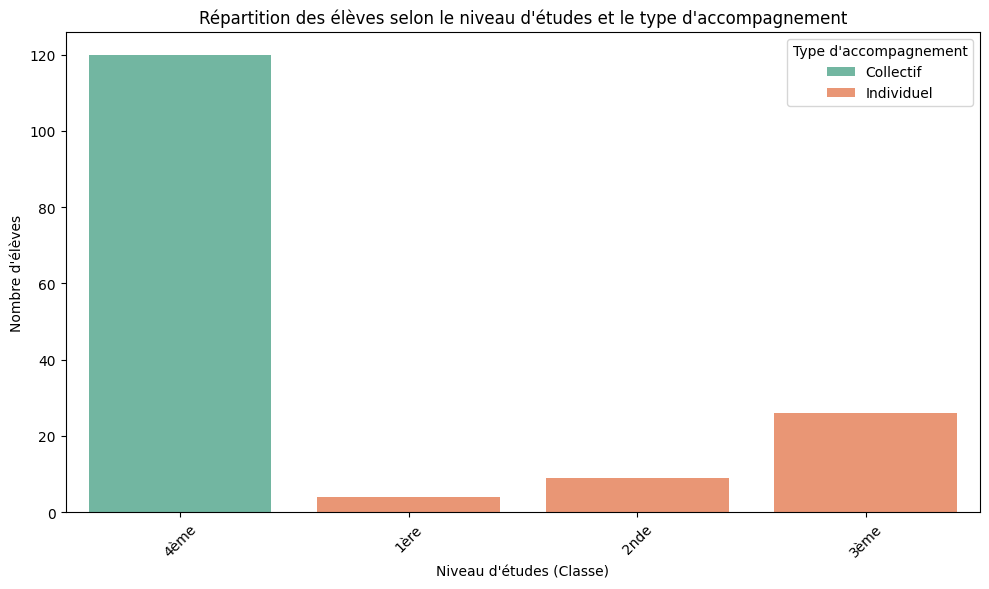

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Classe', hue='Type_acc', palette='Set2')
plt.title("Répartition des élèves selon le niveau d'études et le type d'accompagnement")
plt.xlabel("Niveau d'études (Classe)")
plt.ylabel("Nombre d'élèves")
plt.xticks(rotation=45)
plt.legend(title='Type d\'accompagnement')
plt.tight_layout()
plt.show()

In [ ]:
df_cible = df[df['Grpe_etu'] == 'Cible']


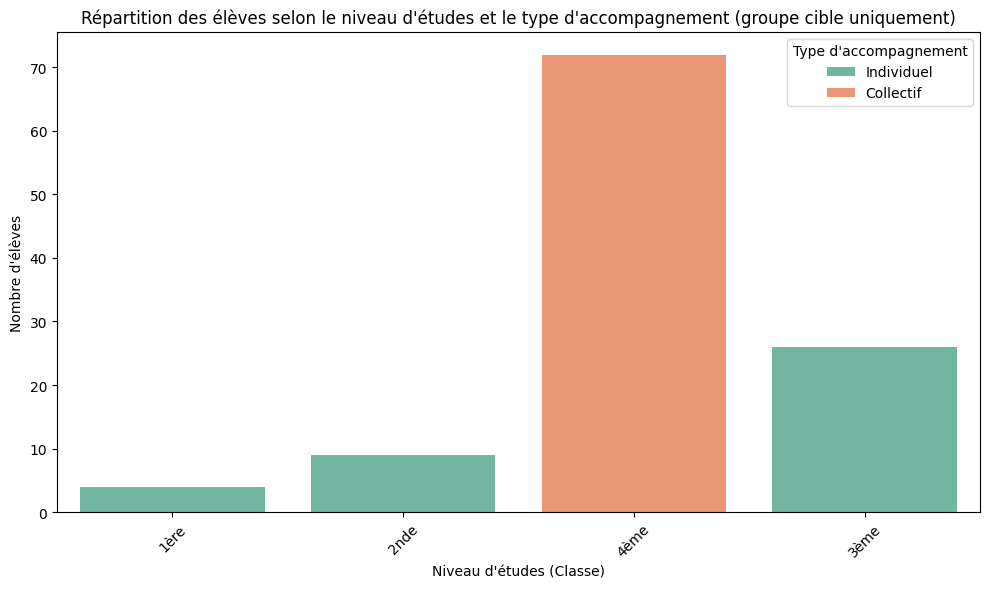

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cible, x='Classe', hue='Type_acc', palette='Set2')
plt.title("Répartition des élèves selon le niveau d'études et le type d'accompagnement (groupe cible uniquement)")
plt.xlabel("Niveau d'études (Classe)")
plt.ylabel("Nombre d'élèves")
plt.xticks(rotation=45)
plt.legend(title="Type d'accompagnement")
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(df_cible['Classe'], df_cible['Type_acc'])


Type_acc,Collectif,Individuel
Classe,,
1ère,0,4
2nde,0,9
3ème,0,26
4ème,72,0


In [ ]:

df_collectif = df[(df['Grpe_etu'] == 'Cible') & (df['Type_acc'] == 'Collectif')]

df_temoin = df[df['Grpe_etu'] == 'Temoin']


<ipython-input-18-1521657294>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collectif['Groupe'] = 'Collectif'


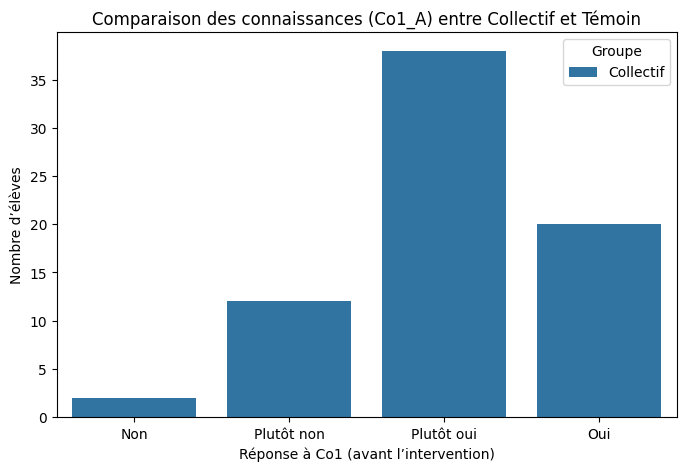

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_collectif['Groupe'] = 'Collectif'
df_temoin['Groupe'] = 'Temoin'

df_compar = pd.concat([df_collectif, df_temoin])

plt.figure(figsize=(8, 5))
sns.countplot(data=df_compar, x='Co1_A', hue='Groupe', order=['Non', 'Plutôt non', 'Plutôt oui', 'Oui'])
plt.title("Comparaison des connaissances (Co1_A) entre Collectif et Témoin")
plt.xlabel("Réponse à Co1 (avant l’intervention)")
plt.ylabel("Nombre d’élèves")
plt.legend(title="Groupe")
plt.show()


In [ ]:
tableau_counts = pd.crosstab(df_compar['Co1_A'], df_compar['Groupe'])
print(tableau_counts)



Groupe      Collectif
Co1_A                
Non                 2
Oui                20
Plutôt non         12
Plutôt oui         38


<ipython-input-19-3563499958>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collectif['Groupe'] = 'Collectif'


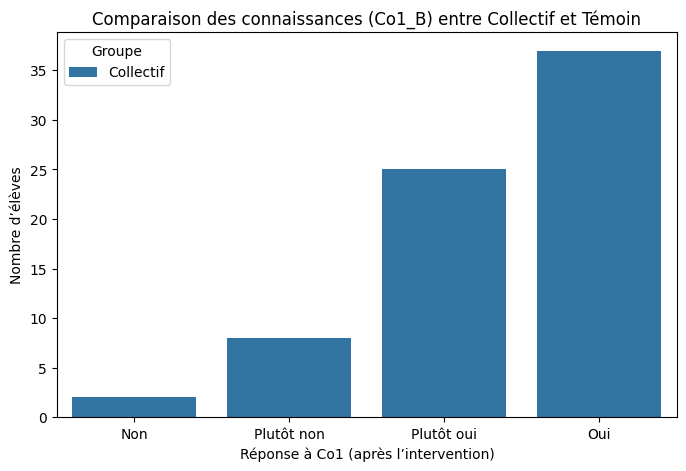

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

df_collectif['Groupe'] = 'Collectif'
df_temoin['Groupe'] = 'Temoin'

df_compar = pd.concat([df_collectif, df_temoin])

plt.figure(figsize=(8, 5))
sns.countplot(data=df_compar, x='Co1_B', hue='Groupe', order=['Non', 'Plutôt non', 'Plutôt oui', 'Oui'])
plt.title("Comparaison des connaissances (Co1_B) entre Collectif et Témoin")
plt.xlabel("Réponse à Co1 (après l’intervention)")
plt.ylabel("Nombre d’élèves")
plt.legend(title="Groupe")
plt.show()



In [ ]:
tableau_counts = pd.crosstab(df_compar['Co1_B'], df_compar['Groupe'])
print(tableau_counts)


Groupe      Collectif
Co1_B                
Non                 2
Oui                37
Plutôt non          8
Plutôt oui         25


In [ ]:
df_collectif = df[(df['Grpe_etu'] == 'Cible') & (df['Type_acc'] == 'Collectif')]

df_temoin = df[df['Grpe_etu'] == 'Témoin']


In [ ]:
from pandas import crosstab

compar_collectif = pd.crosstab(df_collectif['Co1_A'], df_collectif['Co1_B'], normalize='index') * 100
print(compar_collectif.round(1))


Co1_B        Non   Oui  Plutôt non  Plutôt oui
Co1_A                                         
Non         50.0   0.0        50.0         0.0
Oui          0.0  80.0         0.0        20.0
Plutôt non   8.3  16.7        25.0        50.0
Plutôt oui   0.0  50.0        10.5        39.5


In [ ]:
compar_temoin = pd.crosstab(df_temoin['Co1_A'], df_temoin['Co1_B'], normalize='index') * 100
print(compar_temoin.round(1))


Co1_B        Non   Oui  Plutôt non  Plutôt oui
Co1_A                                         
Non          0.0  50.0         0.0        50.0
Oui          9.1  45.5         0.0        45.5
Plutôt non  14.3  14.3        28.6        42.9
Plutôt oui   3.6  42.9         7.1        46.4


In [ ]:
print(df_temoin.shape)


(48, 49)


In [ ]:
df_temoin[['Co1_A', 'Co1_B']].value_counts(dropna=False)


Co1_A       Co1_B     
Plutôt oui  Plutôt oui    13
            Oui           12
Oui         Plutôt oui     5
            Oui            5
Plutôt non  Plutôt oui     3
Plutôt oui  Plutôt non     2
Plutôt non  Plutôt non     2
Non         Oui            1
Oui         Non            1
Non         Plutôt oui     1
Plutôt non  Oui            1
            Non            1
Plutôt oui  Non            1
Name: count, dtype: int64

In [ ]:
temoin_clean = df_temoin.dropna(subset=['Co1_A', 'Co1_B'])

table_temoin = pd.crosstab(
    temoin_clean['Co1_A'],
    temoin_clean['Co1_B'],
    normalize='index'
).round(3) * 100

print(table_temoin)


Co1_B        Non   Oui  Plutôt non  Plutôt oui
Co1_A                                         
Non          0.0  50.0         0.0        50.0
Oui          9.1  45.5         0.0        45.5
Plutôt non  14.3  14.3        28.6        42.9
Plutôt oui   3.6  42.9         7.1        46.4


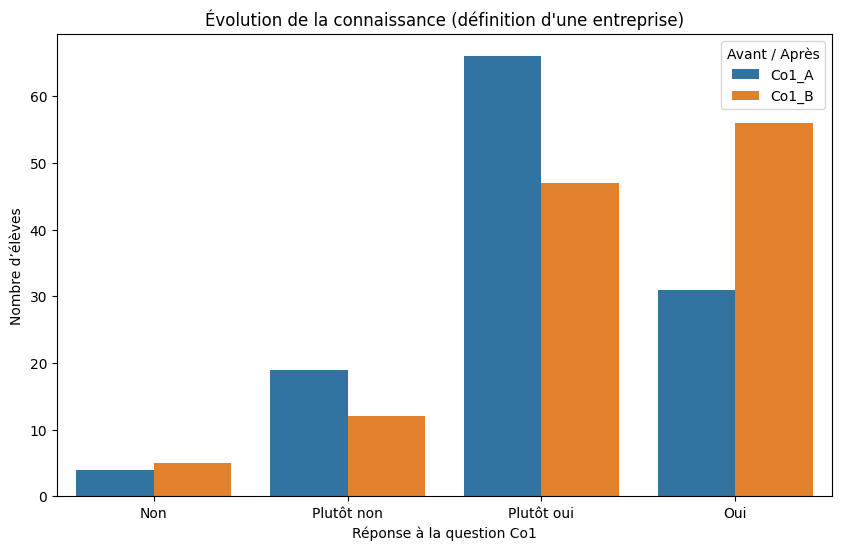

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_collectif_long = df_collectif.melt(id_vars='ID', value_vars=['Co1_A', 'Co1_B'], var_name='Moment', value_name='Réponse')
df_collectif_long['Groupe'] = 'Collectif'

df_temoin_long = df_temoin.melt(id_vars='ID', value_vars=['Co1_A', 'Co1_B'], var_name='Moment', value_name='Réponse')
df_temoin_long['Groupe'] = 'Témoin'

df_long = pd.concat([df_collectif_long, df_temoin_long])

plt.figure(figsize=(10,6))
sns.countplot(data=df_long, x='Réponse', hue='Moment', order=['Non', 'Plutôt non', 'Plutôt oui', 'Oui'])
plt.title("Évolution de la connaissance (définition d'une entreprise)")
plt.xlabel("Réponse à la question Co1")
plt.ylabel("Nombre d’élèves")
plt.legend(title='Avant / Après')
plt.show()


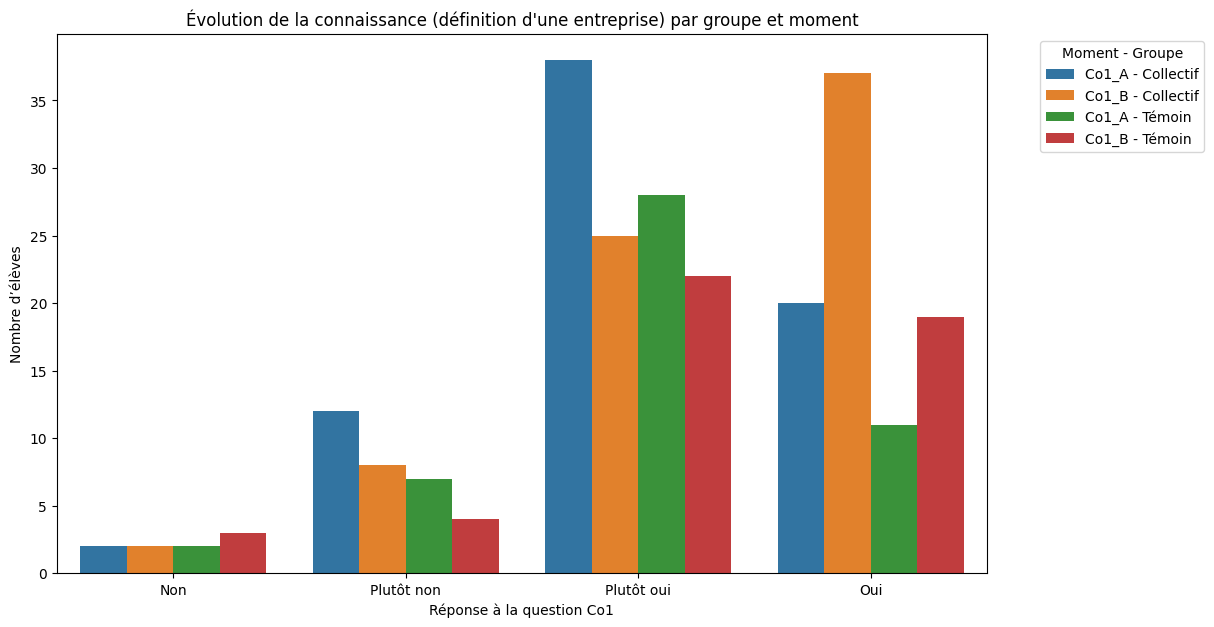

In [ ]:
df_long['Moment_Groupe'] = df_long['Moment'] + " - " + df_long['Groupe']

plt.figure(figsize=(12,7))
sns.countplot(data=df_long, x='Réponse', hue='Moment_Groupe', order=['Non', 'Plutôt non', 'Plutôt oui', 'Oui'])
plt.title("Évolution de la connaissance (définition d'une entreprise) par groupe et moment")
plt.xlabel("Réponse à la question Co1")
plt.ylabel("Nombre d’élèves")
plt.legend(title='Moment - Groupe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


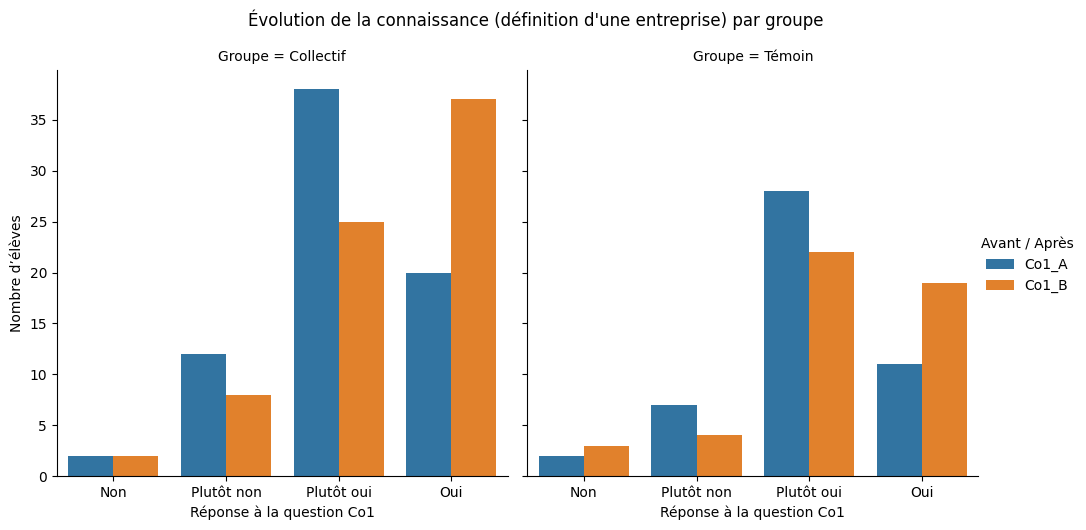

In [ ]:
g = sns.catplot(
    data=df_long,
    x='Réponse',
    hue='Moment',
    col='Groupe',
    kind='count',
    order=['Non', 'Plutôt non', 'Plutôt oui', 'Oui'],
    height=5,
    aspect=1
)
g.fig.suptitle("Évolution de la connaissance (définition d'une entreprise) par groupe", y=1.05)
g.set_axis_labels("Réponse à la question Co1", "Nombre d’élèves")
g._legend.set_title('Avant / Après')
plt.show()


In [ ]:
print('Etu3_A' in df.columns)



False


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

table_orient5 = pd.crosstab(df['Type_acc'], df['Orient5_B'])
print("Contingency Table - Orient5_B:")
print(table_orient5)

chi2_5, p_5, dof_5, expected_5 = chi2_contingency(table_orient5)
print(f"\nTest du Chi² pour Orient5_B : p-value = {p_5:.4f}")








Contingency Table - Orient5_B:
Orient5_B   Non  Oui
Type_acc            
Collectif    53   19
Individuel   18   21

Test du Chi² pour Orient5_B : p-value = 0.0076


In [ ]:



table_orient7 = pd.crosstab(df['Type_acc'], df['Orient7_B'])
print("\nContingency Table - Orient7_B:")
print(table_orient7)

chi2_7, p_7, dof_7, expected_7 = chi2_contingency(table_orient7)
print(f"\nTest du Chi² pour Orient7_B : p-value = {p_7:.4f}")



Contingency Table - Orient7_B:
Orient7_B   999  C'était déjà mon cas  Non  Oui
Type_acc                                       
Collectif     0                    16   20   36
Individuel    2                     5    3   29

Test du Chi² pour Orient7_B : p-value = 0.0062


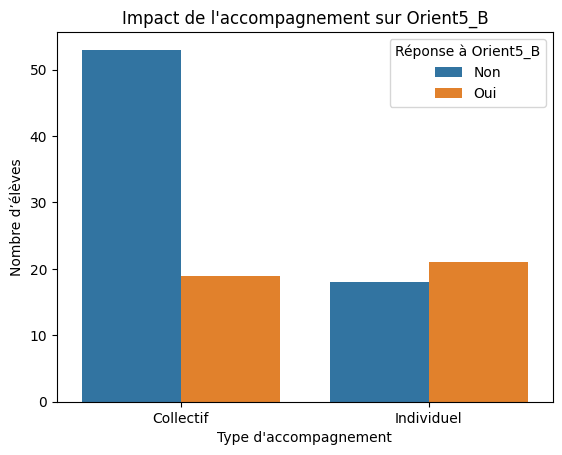

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Type_acc', hue='Orient5_B')
plt.title("Impact de l'accompagnement sur Orient5_B")
plt.xlabel("Type d'accompagnement")
plt.ylabel("Nombre d’élèves")
plt.legend(title="Réponse à Orient5_B")
plt.show()


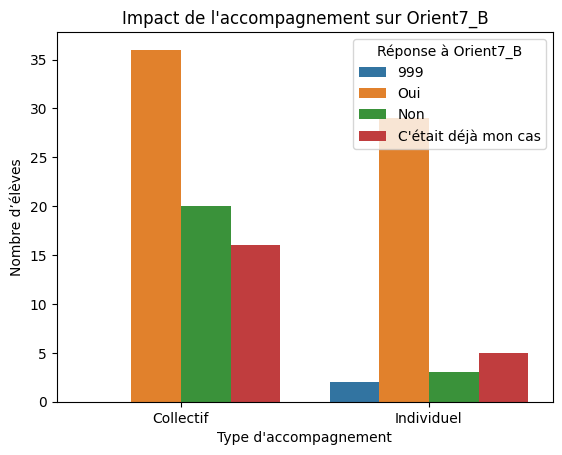

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Type_acc', hue='Orient7_B')
plt.title("Impact de l'accompagnement sur Orient7_B")
plt.xlabel("Type d'accompagnement")
plt.ylabel("Nombre d’élèves")
plt.legend(title="Réponse à Orient7_B")
plt.show()

In [ ]:
df = df[df['Orient7_B'] != '999']


In [ ]:
table_orient7 = pd.crosstab(df['Type_acc'], df['Orient7_B'])
print("\nContingency Table - Orient7_B:")
print(table_orient7)

chi2_7, p_7, dof_7, expected_7 = chi2_contingency(table_orient7)
print(f"\nTest du Chi² pour Orient7_B : p-value = {p_7:.4f}")


Contingency Table - Orient7_B:
Orient7_B   C'était déjà mon cas  Non  Oui
Type_acc                                  
Collectif                     16   20   36
Individuel                     5    3   29

Test du Chi² pour Orient7_B : p-value = 0.0126


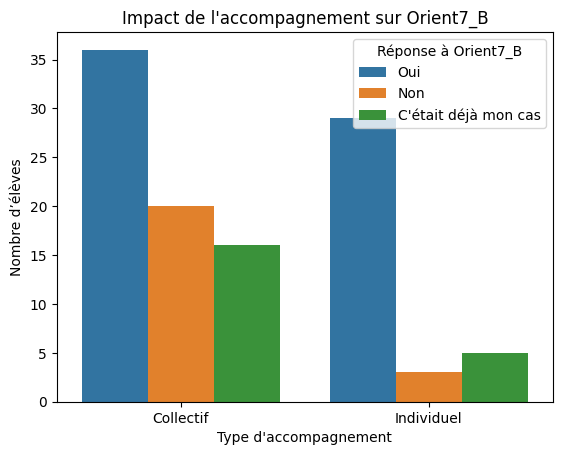

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Type_acc', hue='Orient7_B')
plt.title("Impact de l'accompagnement sur Orient7_B")
plt.xlabel("Type d'accompagnement")
plt.ylabel("Nombre d’élèves")
plt.legend(title="Réponse à Orient7_B")
plt.show()

In [ ]:
#question 3



table = pd.crosstab(df['Type_acc'], df['Etu3_B'])
print(table)


Etu3_B      Non  Oui
Type_acc            
Collectif    39   23
Individuel    4   12


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table)
print(f"p-value = {p:.4f}")


p-value = 0.0149


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(df['Type_acc'], df['Etu3_B'])
print("Contingency Table:")
print(table)






Contingency Table:
Etu3_B      Non  Oui
Type_acc            
Collectif    39   23
Individuel    4   12


In [ ]:
chi2, p, dof, expected = chi2_contingency(table)
print(f"\nTest du Chi² : p-value = {p:.4f}")



Test du Chi² : p-value = 0.0149


# New Section